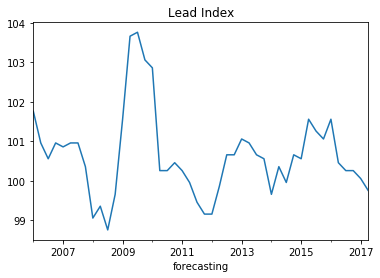

In [ ]:
# ARIMA时序模型

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 加载数据
path = "./RNN/dataSets/train-test.csv"
dataset = pd.read_csv(path,index_col='forecasting',usecols=[0,1])

# split into train and test sets; 80% 是训练数据，其余是测试数据
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
train.index = pd.to_datetime(train.index)  # 将字符串索引转换成时间索引
test.index = pd.to_datetime(test.index)
val = test['lead']
ts = train['lead']  # 生成pd.Series对象

# ts.head()
# ts.head().index
ts.plot()
plt.title("Lead Index")
plt.show()

/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


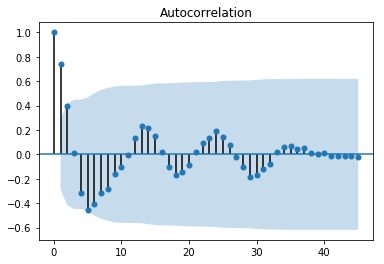

In [3]:
# 自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts).show()

In [4]:
# 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF

#返回值依次为：adf, pvalue p值,usedlag, nobs, critical values临界值
print(u'原始序列的ADF检验结果为：', ADF(ts))

原始序列的ADF检验结果为： (-2.522228357645997, 0.11015917094730404, 8, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 72.310974548563195)


/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


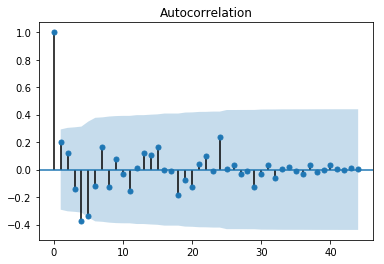

In [5]:
# 时间序列的差分平移
data = ts.diff(1).dropna()

# 差分过后自相关图
plot_acf(data).show()

In [6]:
from statsmodels.tsa.arima_model import ARIMA # 定阶

pmax =int(len(data)/10)
qmax =int(len(data)/10)

bic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(ts, (p,1,q)).fit().bic)
        except:
          tmp.append(None)
        bic_matrix.append(tmp)
        
#从中可以找出最小值
bic_matrix = pd.DataFrame(bic_matrix) # 先用stack展平，然后用idxmin找出最小值位置。

p,q = bic_matrix.stack().idxmin()

print(u'BIC最小的p值和q值为：%s、%s'%(p,q))

/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


BIC最小的p值和q值为：0、4


In [7]:
# 建立ARIMA(0, 1, 1)模型

model = ARIMA(ts, (p,1,q)).fit()

# predict_dta = model.predict("2014","2017",dynamic=True)
# print(predict_dta)


# fig, ax = plt.subplots(figsize=(12, 8))
# ax = ts.ix['2000':].plot(ax=ax)
# fig = model.plot_predict('2014', '2017', dynamic=True, ax=ax, plot_insample=False)
# plt.show()
#作为期10-2015--2017天的预测，返回预测结果、标准误差、置信区间。
pred = model.forecast(7)
train_predict = pred[0] #还原
print(train_predict)
#train_predict
# print(test)
# val.plot()
# plt.plot(figsize=(12,8))
# plt.show()

[ 100.09058293  100.09301337  100.03097931  100.21383629  100.19526195
  100.17668762  100.15811328]
